# **Logistic Regression**

**Binary Classification(이진 분류)**

로지스틱 회귀는 이진 분류(binaray classification)를 하기 위해 사용되는 알고리즘 중 하나
- 이진 분류는 예를 들어 그렇다 또는 아니다, 2개로 분류하는 것으로, 이때 결과가 '그렇다'인 경우 1로 표현하고, '아니다'이면 0으로 표현.

**example**

- 간단한 이항 분류 문제로 아래 그림과 같이 64 x 64의 이미지가 주어지고 이것이 고양이 그림인지(1) 혹은 그렇지 않은지(0)을 분류해야 한다고 해 보자. (앞으로 출력값을 y로 표기하기로 한다.)

- (아래 예시 그림은 공간이 부족하여 5 x 5 행렬로 그림) 이 예제의 이미지는 각각 적색, 녹색, 파란색의 강도(0~255)를 표현하는 3개의 64 x 64 행렬로 컴퓨터에 저장된다. 입력 데이터를 열 벡터로 표현해보면 우선 적색 행렬의 좌측 상단부터 255, 231, 42, 22, 123, ... , 202를 아래로 나열하고, 그 아래로 녹색 행렬의 숫자들 255, 134, 202, ... 그리고 파란색 행렬의 숫자를 모두 나열한다.
- 이는 $\mathbb{R}^{12288 \times 1}$의 열 벡터가 될 것이다. (64 x 64 x 3 = 12288). 이때 입력 피처(input feature) 크기를
로 표기하기로 하며, 아래 예에서는 그 값이 12288이다. (종종 간단히 n이라 표기하기도 할 것이다)

결국 이 문제에서 하려는 것은 x가 주어졌을 때 y를 맞추는 것이다.

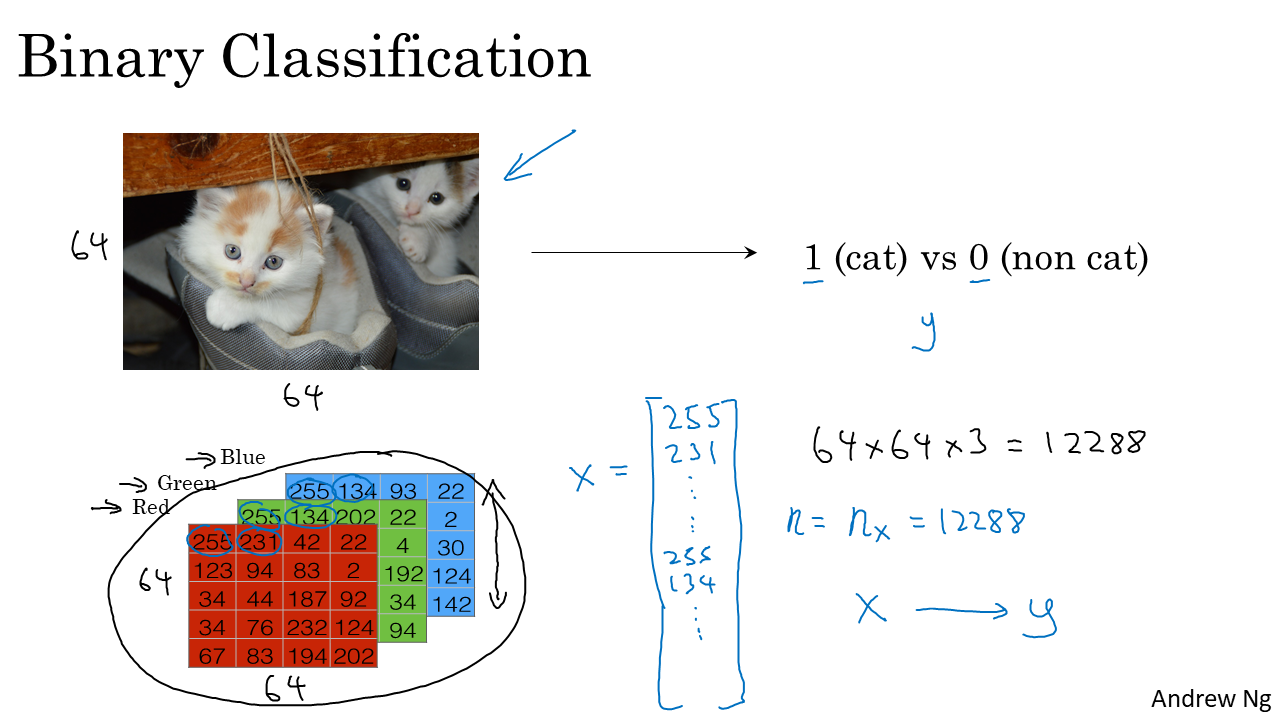

**표기법**

- 훈련 데이터 한건은 $(x, y)$의 쌍이며, $x$는 $x \in \mathbb{R}^{n_x}$의 열-벡터(column vector)이고, $y$는 1 혹은 0의 값을 갖는다.($y \in \{0, 1\}$)
- 훈련 데이터의 건수는 $m$이라 표기할 것이다. 즉 $\left\{(x^{(1)}, y^{(1)}), ~ (x^{(2)}, y^{(2)}), ~ \cdots ~, (x^{(m)}, y^{(m)})\right\}$로 구성된 데이터이다.
- 종종 훈련 데이터의 건수라는 것을 표현하기 위해 $m_{train}$와 같은 표기도 사용할 것이며, 테스트 데이터의 건수는 $m_{test}$로 표기할 것이다.
- 입력 데이터를 행렬로 표현할 때는 $X$로 표기할 것이며, 각 변수가 열-벡터로 $m$개 열이 $X$을 구성하게 된다. 물론 각 데이터 건을 전치된 열-벡터(transposed column vector)로 위에서부터 쌓는 구조로 $X$를 표현할수도 있으나 각 변수를 열-벡터로 표현하면 그 구현이 훨신 수월해진다.
- 출력 데이터는 $m$건의 출력값을 행-벡터($y \in \mathbb{R}^{1\times m}$)로 표현한다. 물론 열-벡터로 표현하는 것도 가능하지만 행-벡터로 표현하는 것이 파이썬 구현을 훨씬 수월하게 하며, 행-벡터로 표현했을 때 파이썬 벡터의 shape값이 (1, m)이 된다.

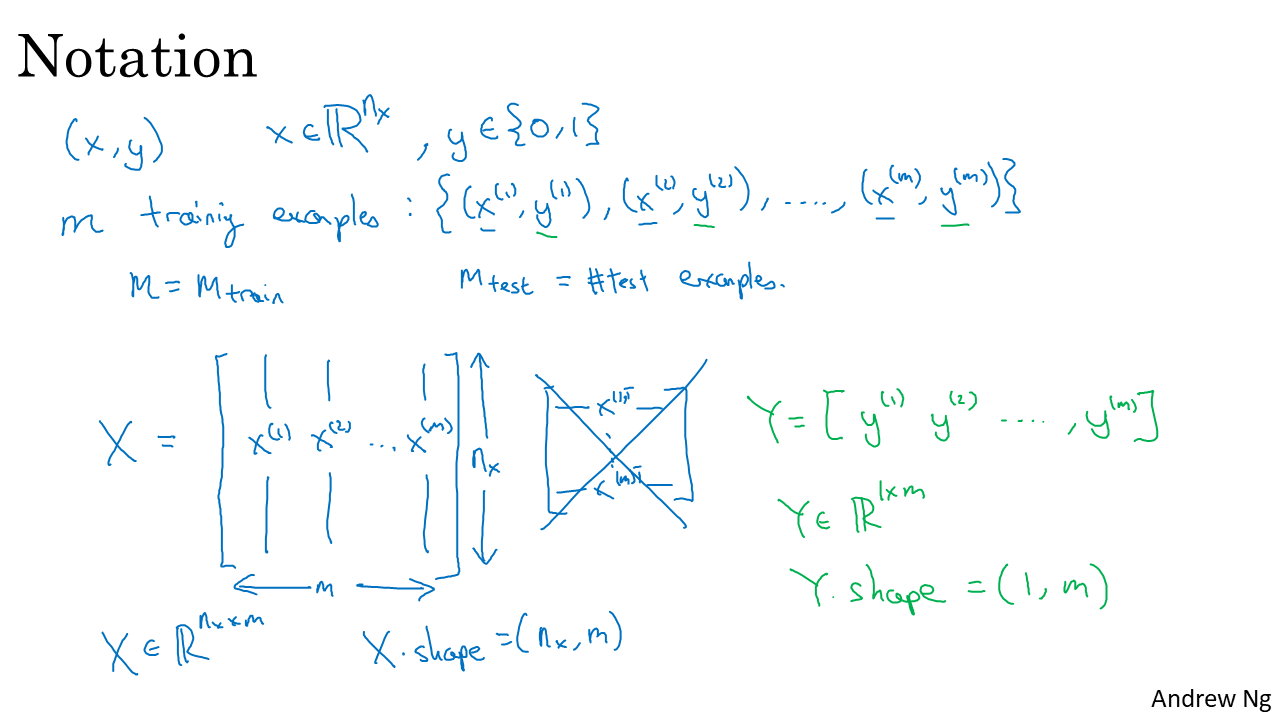

**Logistic Regression(로지스틱 회귀)**

- 로지스틱 회귀는 이진 분류 문제에 사용되는 알고리즘.
- 입력 값인 X에 대해서, y(주어진 입력 특성 X에 해당되는 실제 값)가 1일 때의 예측값을 ŷ (P(y=1|X)라고 합니다. 예측값 ŷ은 X일 때 y가 1인 확률을 의미하며, 0 ≤ ŷ < 1 사이의 값을 가집니다.
- 다만, ŷ = wX + b (w, b = 파라미터, w = 입력 값, b = 잔차)에서 0과 1 사이의 확률 범위를 벗어날 수 있기에, 이때 시그모이드 함수(sigmoid function) 등을 활용해 0과 1 사이의 값으로 변환해줌.

- 중요한 점은 이진 분류에 있어 그렇다(=1), 아니다(=0)를 예측하는 확률의 범위는 0과 1 사이기에, 이에 맞춰 가중치를 조정해야 되기에, 시그모이드 함수 등을 활용해서 예측값 ŷ의 확률을 조정하는 것.

- $x$는 $n_x$차원 벡터($x\in \mathbb{R}^{n_x}$)이고      
모형의 모수(parameter)  $b$와 $w$는 각각 실수($b \in \mathbb{R})$와 $n_x$차원 벡터($w\in \mathbb{R}^{n_x}$)이다.

$$\sigma(z) = \frac{1}{1 + \exp^{-z}}, ~ z = w^Tx + b$$


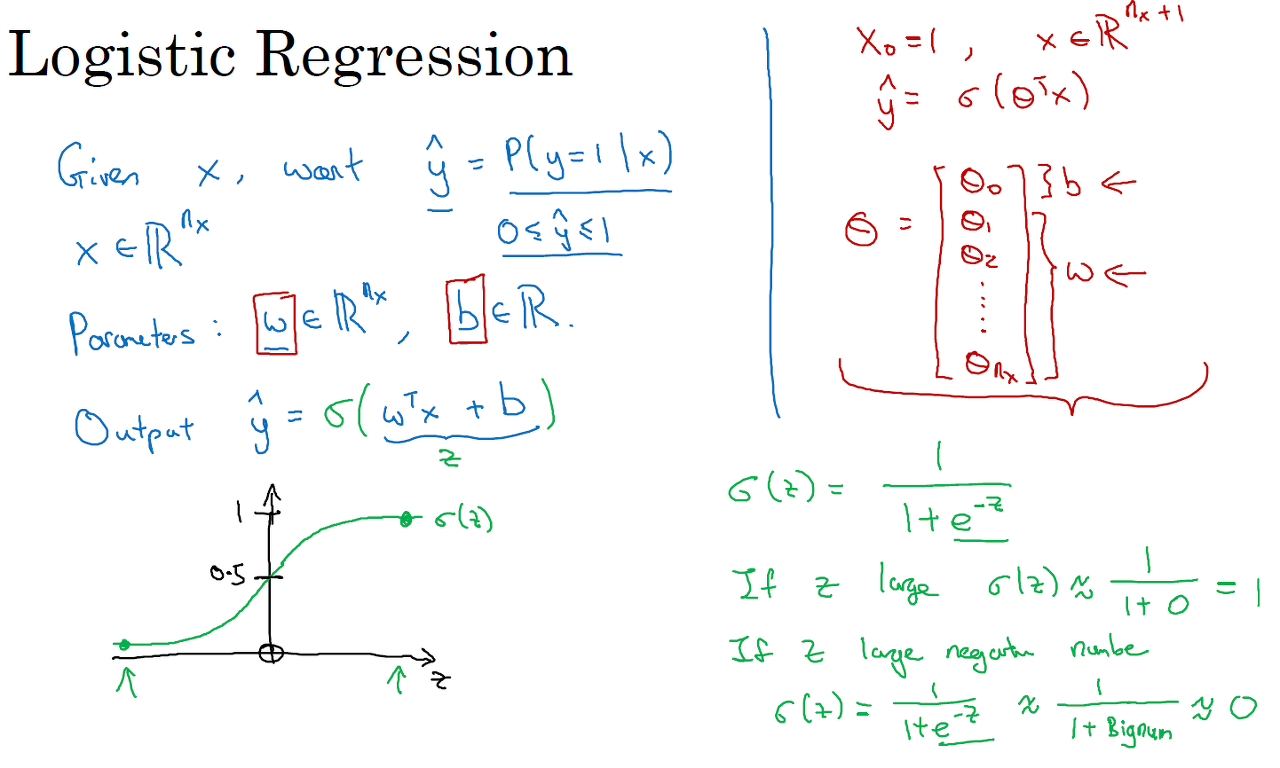

**Logistic Regression cost function(로지스틱 회귀 비용 함수)**

- $i$번째 데이터 샘플을 $(x^{(i)}, y^{(i)})$라 할 때 로지스틱 회귀모형의 목표는 모형 출력값인 $\hat{y}^{(i)}$가 실제 타겟 값인 $y^{(i)}$와 최대한 가까워지는 것이다.
- 일반적으로 전체 데이터 $m$건에 대하여 그 차이가 작다면 좋을 것이다.
- 이를 위해 일반적으로 많이 사용하는 오차 제곱합을 최소화 하는 접근법
  - ($\mathrm{argmin}_{w, b}\sum_i^m \frac{1}{2}\left( \hat{y}^{(i)} - y \right)^2$)을 사용할 수도 있을것 같으나,
  - 최소화 하려는 이 함수가 볼록함수(convex function)가 아니라는 문제가 있다.



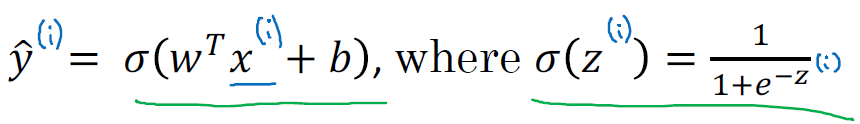

- 손실 함수는 하나의 입력에 대해 실제값(y)과 예측값(ŷ)의 차이인 오차를 계산하는 함수이고, 이러한 모든 입력에 대한 오차를 계산하는 함수를 비용 함수.

**로지스틱 회귀에서 사용하는 손실 함수**

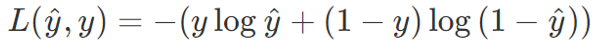


 - 오차(loss, error) 함수로 $\mathcal{L}(\hat{y}, y) = \frac{1}{2}\left( \hat{y} - y \right)^2$ 대신,
 - $\mathcal{L}(\hat{y}, y) = -\left( y\log\hat{y} + (1-y) \log(1-\hat{y})\right)$를 사용한다.

**비용 함수는 모든 입력에 대해 계산한 손실 함수의 평균값으로 계산할 수 있다.**

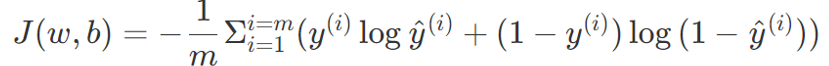

- (※ 샘플 하나에 대한 오차를 loss라 부름) 이 함수의 의미를 생각해보면 $y=1$일 때에는 loss 함수가 $\mathcal{L}(\hat{y}, y) = -\log \hat{y}$가 되며 예측값이 1에서 멀어질 수록 큰 오차를 부과
- 반대로 $y=0$일 때에는 오차 함수가 $\mathcal{L}(\hat{y}, y) = -\log(1- \hat{y})$가 되며 예측값이 0에서 멀어질 수록 큰 오차를 부과함

이때, 주의할 점은 회귀 모형을 사용하는 목적은 실제값(y)과 근접한 예측값(ŷ)을 찾기를 위함이며, 비용 함수의 값이 작아지도록 하는 w와 b를 찾는 것이 이를 위한 방법.

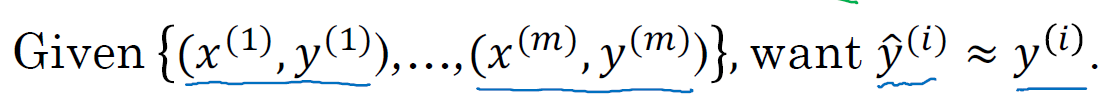

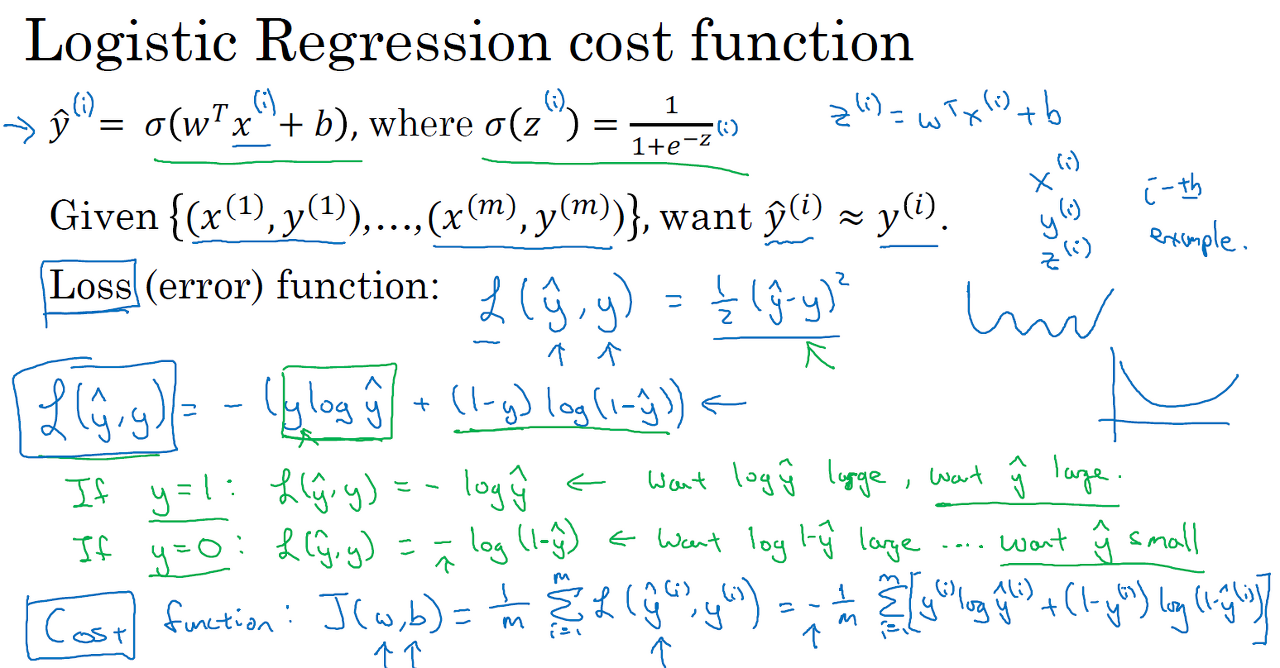

**Gradient descent(기울기 하강)**

- 비용 함수가 전체 데이터셋의 예측이 얼마나 잘 되었는지 확인하는 것이면, 경사 하강법(Gradient descent)은 이를 가능하게 하는 파라미터 w와 b를 찾아내는 방법.

- 최적화(optimize)할 비용함수 $J(w, b)$를 정의 했었고, 비용함수가 최소값이 되도록 하는 $w$와 $b$를 찾아야 한다. 다행히도 우리가 최적화 하려는 로지스틱 회귀모형의 비용함수는 볼록(convex)함수 이므로 전역 최소값(global minimum)이 단 하나 존재한다.

- 전역 최소값을 찾기 위해 우선 $w$와 $b$를 어떤 임의 값으로 초기화 하고, 초기값 $(w, b)$에서 시작하여 가장 경사가 가파른 방향으로 $(w, b)$ 값을 조금식 변화시키는데, 비용함수 값이 임계치 이상 바뀌지 않을 때까지 $(w, b)$ 수정을 반복한다.

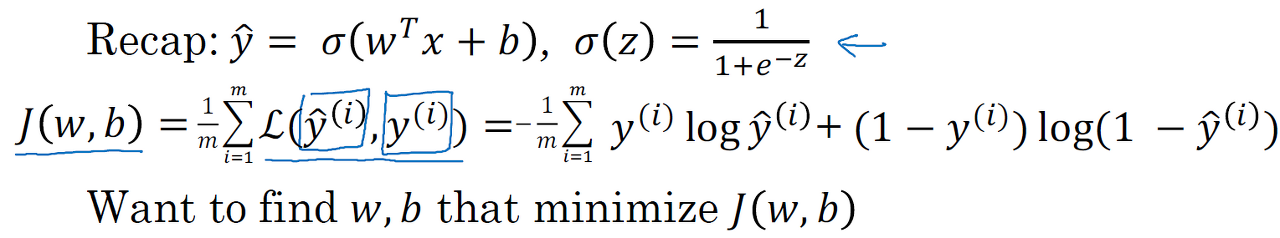

**경사 하강법을 찾기 위해서**

- 비용 함수의 형태가 볼록한 형태여야 합니다.
- 함수의 최솟값을 모르기 때문에, 임의의 점을 시작으로 도함수(derivative), 함수의 기울기를 따라서 비용 함수의 최저점을 찾아가는 과정을 진행

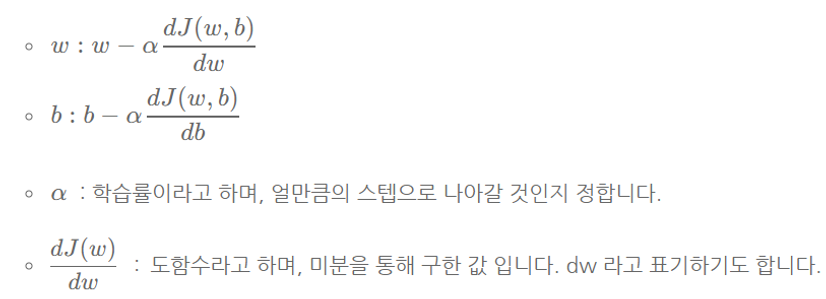

**$(w, b)$를 변화시켜가는 과정을 자세히 살펴보자.**
- 설명을 위해 $b$는 없고 $w$만 있다고 가정해보자.
- 이때 $w$에 따른 비용함수의 값은 아래 그림과 같이 (아래로) 볼록한 함수가 될 것이다.
- 아래와 같이 $w$ 수정을 반복하며 반복하게 되며 수정의 정도를 표현하기 위해 learning rate $\alpha$를 사용한다.

$$
\begin{align}
&\mathrm{Repeat}  ~ \{ \\
&~~w:=w-\alpha \frac{dJ(w)}{dw} \\
&\} \\
\end{align}
$$

- 도함수(dw)가 0보다 크면, 파라미터 w는 기존의 w보다 작은 방향으로 이동하고, 반면에 dw가 0보다 작으면, 파라미터 w는 기존의 w보다 큰 방향으로 이동하게 됩니다.
- 위 과정을 반복하여 비용 함수의 최저점을 찾게 됩니다.

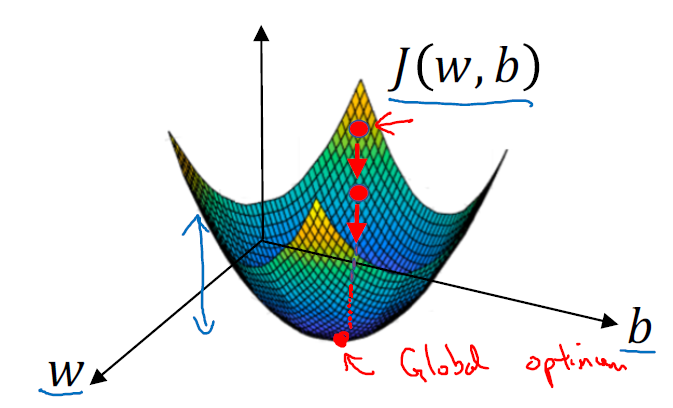

- 사실 비용 함수에 $w$가 하나만 있지는 않을 것이기 때문에 , 미분을 표현할 때 상미분(ordinary derivative, $dx$)이 아니라 편미분(partial derivative, $\partial x$)으로 표기하는 것이 옳다.
- 즉 $\frac{\partial J(w, b)}{\partial w_k}$ 로 표기 해야 한다.

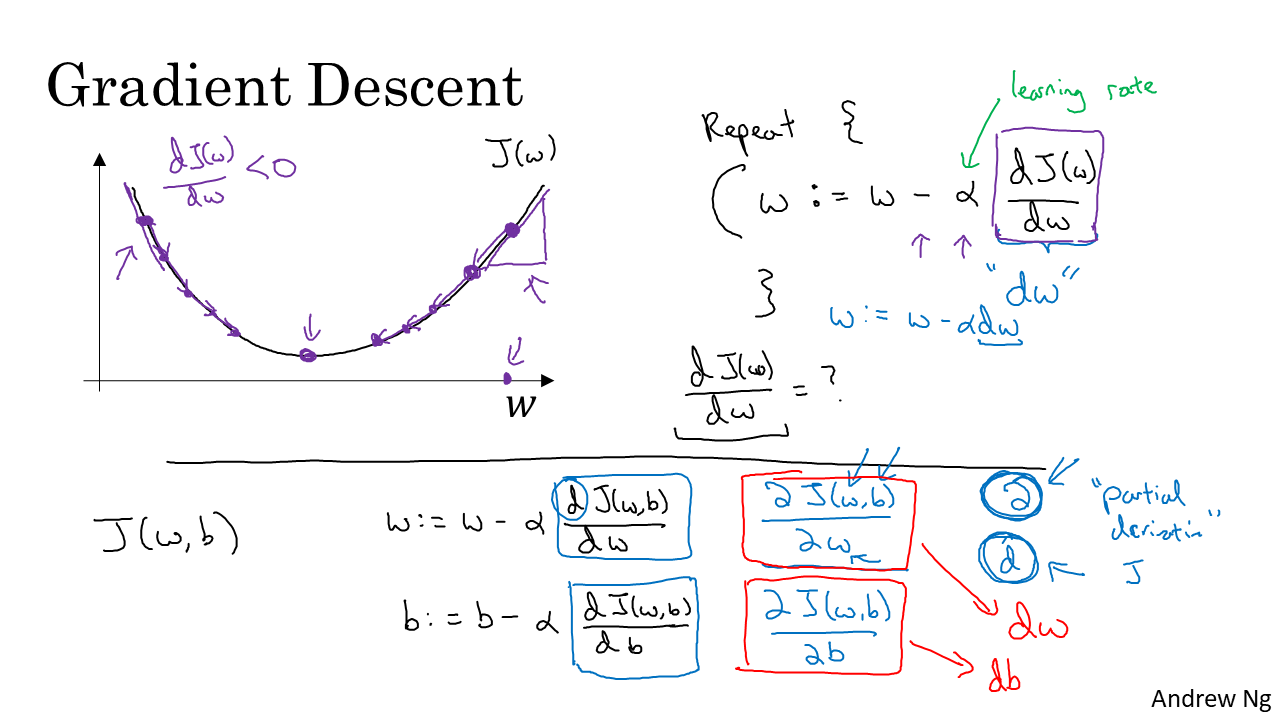

# **Derivative**

**도함수의 개념**



도함수는 함수의 기울기와 동일하며, 높이/너비로 구합니다. 일차함수, 이차함수, 로그함수 등 함수의 모향에 따라 도함수의 값은 다르지만, 축의 값이 증가, 감소함에 상관없이 도함수의 값은 동일합니다.

**도함수의 예**



이차함수에서의 도함수도 일차함수와 동일하게 기울기(높이/너비)를 통해서 구할 수 있습니다. a가 2일 때(a=2), 0.0001만큼 약간 오른쪽으로 이동하는 경우(nudging a right by slightly)에 도함수는 4입니다(a=2일 때, d/da = 4)

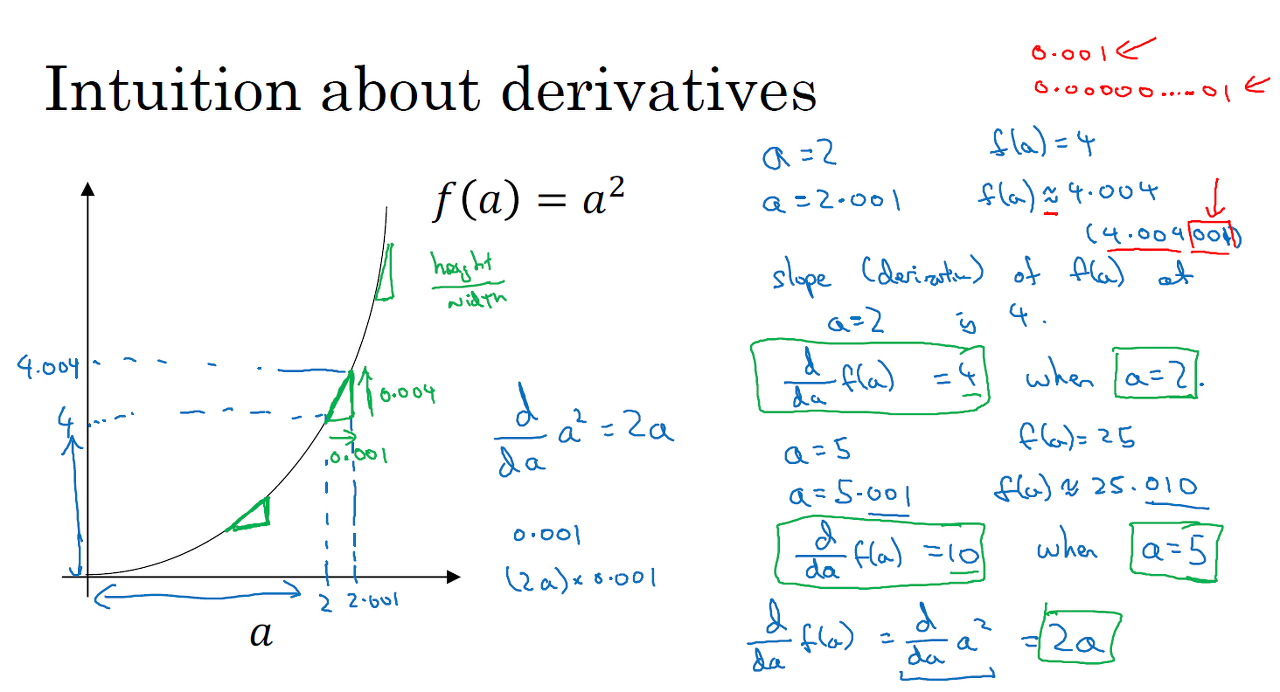

이차함수와 삼차 함수의 경우에도 동일하게, 축의 변화에 상관없이 도함수는 동일

기본적인 몇가지 미분 예는 아래와 같다.
$$
\begin{align}
f(a)=a^2, &~~ \frac{d}{da}f(a) = 2a \\
f(a)=a^3, &~~ \frac{d}{da}f(a) = 3a^2 \\
f(a)=\ln(a), &~~ \frac{d}{da}f(a) = 1/a\\
\end{align}
$$

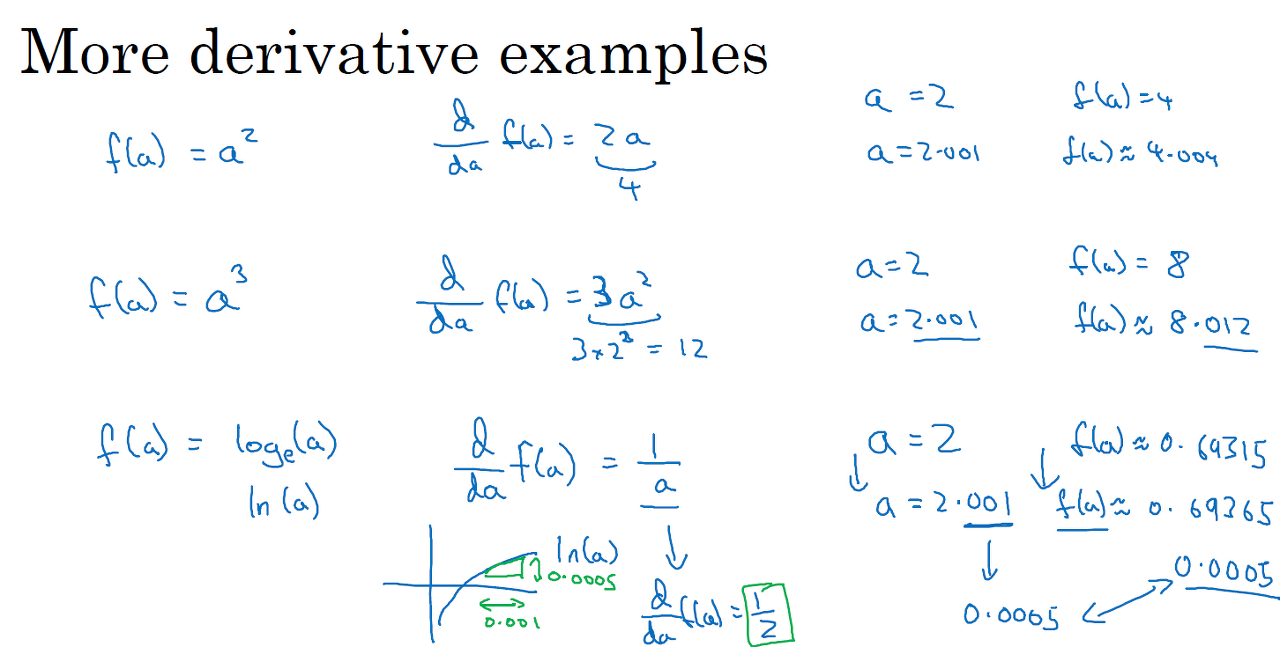

**Computing derivatives(도함수 계산)**

- 신경망의 연산은 순전파(forward propagation)에 이은 역전파(backward propagation)로 구성된다.
- Computation Graph를 통해 신경망 연산이 왜 이렇게 구성되어 있는지 살펴볼 것이다.

- 설명을 위해 아주 간단한 예시 함수 $J(a, b, c)=3(a + bc)$의 순전파와 역전파 과정을 Computation Graph로 살펴보자.
 - 순전파 과정은 입력값 $(a, b, c)$를 이용해 $J$를 계산하는 것인데 3단계로 나뉜다.
 - $b$와 $c$를 이용해 $u=bc$를 계산
 - 두번째로 $a$와 $u$를 이용해 $v=a+u$를 계산
 - 마지막으로 $v$를 이용해 $J=3v$를 계산

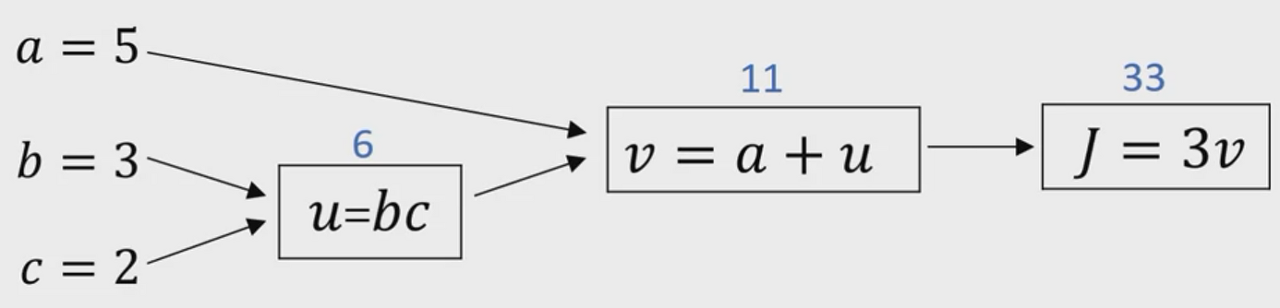

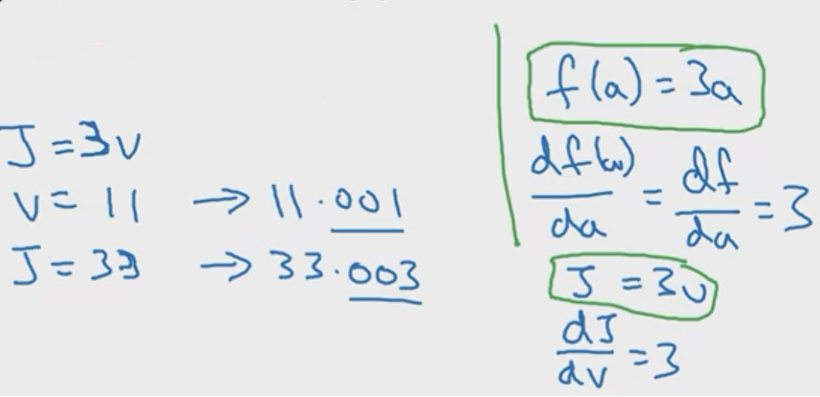

- 역전파(backward propagation)는 $J$에 대한 미분을 구하는 과정
- Computation Graph로 이 과정을 어떻게 나타낼 수 있는지 확인.

- $J=3v$이므로 $\frac{dJ}{dv}$는 $3$
- 두번째로 $\frac{dv}{da}$는 $1$
- 세번째로 $\frac{dJ}{da}$는 $\frac{dJ}{dv}\frac{dv}{da}$이므로 $3$이고 마찬가지로 $\frac{dJ}{du}=\frac{dJ}{dv}\frac{dv}{du}=3$.

- 대부분의 미분이 $J$를 미분하는 것이므로 앞으로 코드에서는 $\frac{d\mathbf{FinalOutputVar}}{d\mathbf{var}}$에 대한 변수명으로 dvar을 사용할 것.
- 예를들어 $\frac{dJ}{du}$에 대한 변수명으로 'du'를 사용할 것.
  - dv = 3
  - da = 3
  - du = 3

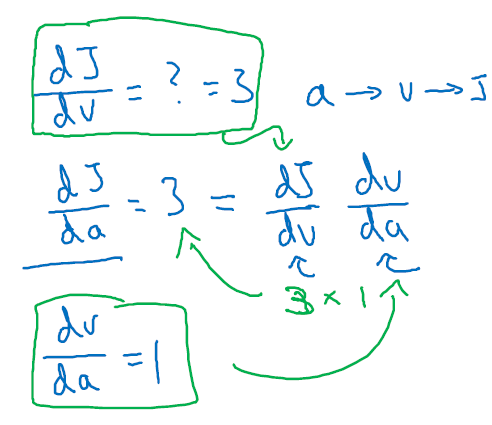

- $\frac{dJ}{db}=\frac{dJ}{dv}\frac{dv}{db}=3c$인데 이 미분은 $b$가 아닌 다른 변수는 주어진 경우 이므로 값이 $6$.
- $\frac{dJ}{dc}=\frac{dJ}{dv}\frac{dv}{dc}=3b=9$.
  - db = 6
  - dc = 9

결국 Computation Graph의 역방향을 따라 chain rule을 이어갈 수 있음을 알 수 있다.
(예를들어 $\frac{dJ}{db}=\frac{du}{db}\frac{dv}{du}\frac{dJ}{dv}$이다.)

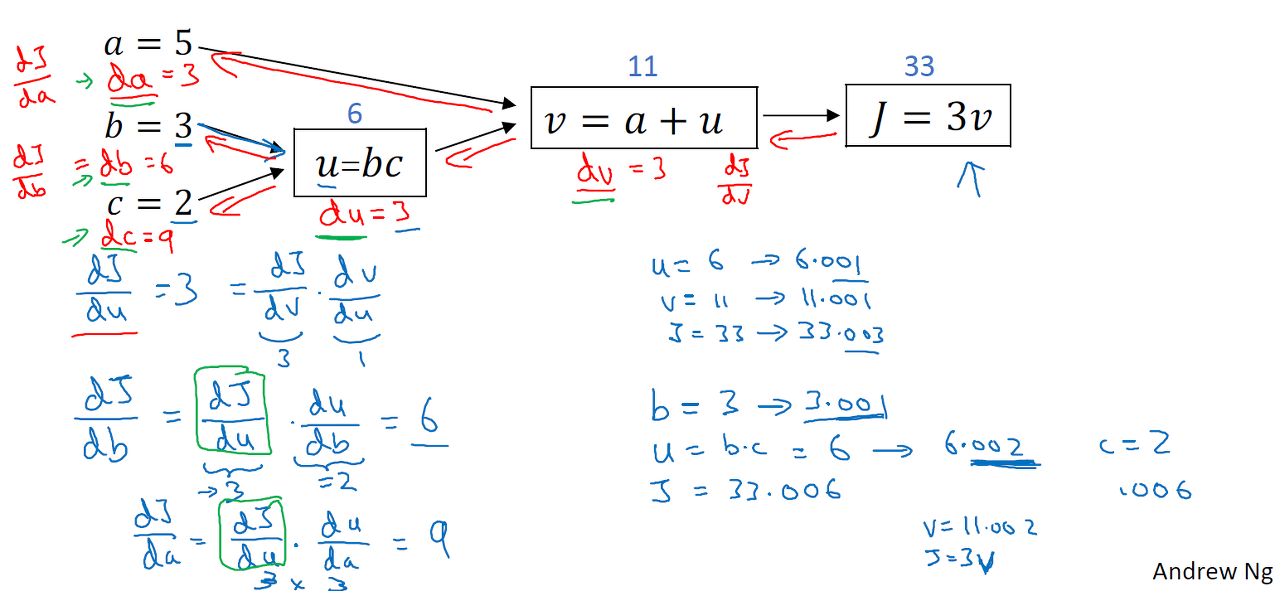

# **Logistic Regression Gradient descent**

**Logistic Regression Gradient descent(로지스틱 회귀 기울기 하강)**

- Computation Graph를 이용해 ($w$가 두개인)로지스틱 회귀모형의 비용함수(cost function)에 대한 미분항들 계산.

- 한건의 데이터 샘플에 대한 오차 함수(loss, error function), $\mathcal{L}(a, y)$를 구하는 과정은 $(x_1, w_1, x_2, w_2, b)$가 주어졌을 때 $z$, $\hat{y}$, $\mathcal{L}(a, y)$를 차례로 구하는 것으로 나눌 수 있다
- 이 과정을 아래 그림과 같은 Computation Graph로 나타낼 수 있음.

- 주어진 데이터를 이용해 최적의 모형을 찾는 것은 $\mathcal{L}(a, y)$가 줄어들도록 $w_1$과 $w_2$를 변화시키는 것이며 이를 위해서는 $\frac{\mathcal{L}(a,y)}{dw_1}$과 $\frac{\mathcal{L}(a,y)}{dw_2}$를 구해야 함.


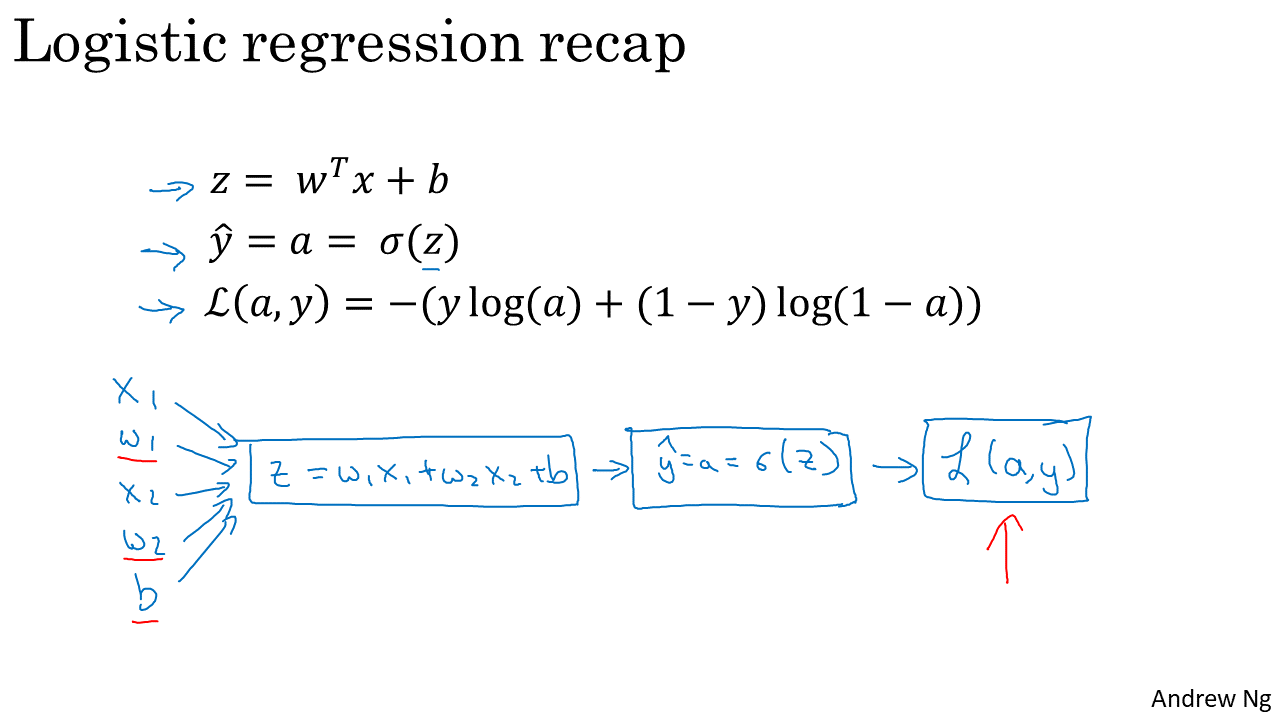

- $\mathcal{L}(a,y) = -\left( y\log\hat{y} + (1-y) \log(1-\hat{y})\right)$를 $a$관하여 미분하여 $\frac{\mathcal{L}(a,y)}{da}=-\frac{y}{a} + \frac{1-y}{1-a}$라는 것을 알 수 있고 이것을 'da'라고 표기.

- $\frac{d\mathcal{L}(a,y)}{dz}=\frac{d\mathcal{L}(a,y)}{da}\frac{da}{dz} = \left(-\frac{y}{a} + \frac{1-y}{1-a}\right) \cdot a(1-a) = a-y$이고 이것을 'dz'라 표기.

- $\frac{d\mathcal{L}(a,y)}{dw_1}=\frac{d\mathcal{L}(a,y)}{da}\frac{da}{dz}\frac{dz}{dw_1} = \frac{d\mathcal{L}(a,y)}{dz}\frac{dz}{dw_1} = \frac{d\mathcal{L}(a,y)}{dz} \cdot x_1$이고 이것을 'dw1'이라 표기, $x_1\cdot$'dz'와 같다.
- 마찬가지로 dw2는 $x_2 \cdot$'dz'이고, 'db'는 $\frac{dz}{db}=1$이므로 'dz'와 같다.($\frac{d\mathcal{L}(a,y)}{db} = \frac{d\mathcal{L}(a,y)}{dz}\frac{dz}{db}$)

- Computation Graph에서 이 계산 과정을 살펴보면 $\frac{d\mathcal{L}(a,y)}{dw_1}$을 구하는 것은 단지 (마지막 노드로부터) 노드 [$a=\sigma(z)$]까지 계산된 미분항 'dz'에 $\frac{dz}{dw_1}$을 곱하는 것.

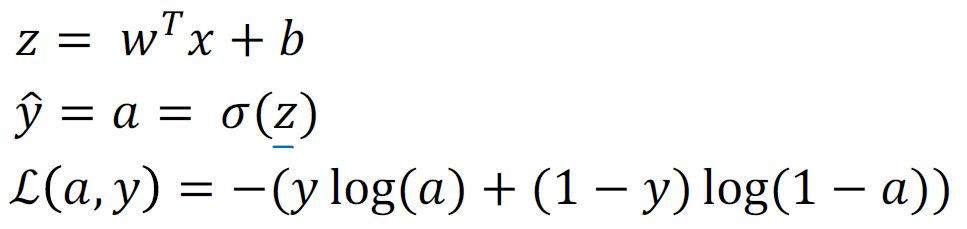

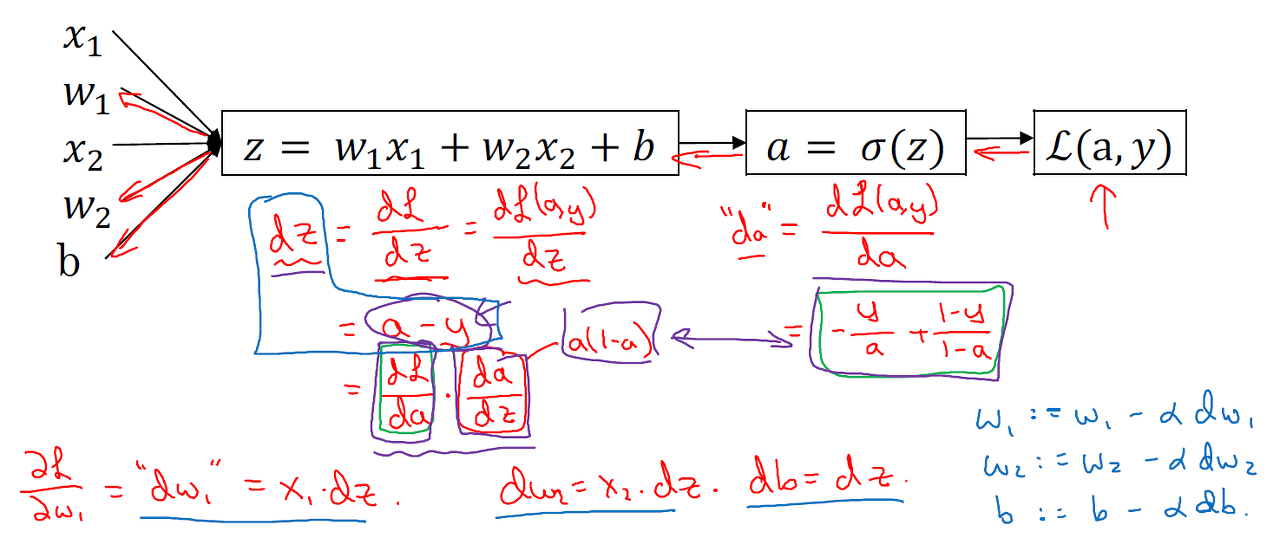

**Gradient Descent on m Examples**

$J(w,b)=\frac{1}{m}\sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$이므로, 전체 $m$건의 데이터에 대한 비용-미분항들은 아래와 같다.     
$$\begin{align}
\frac{dJ(w,b)}{dw_1}&=\frac{1}{m}\sum_{i=1}^m \frac{d\mathcal{L}(a^{(i)}, y^{(i)})}{dw_1} \\
\frac{dJ(w,b)}{dw_2}&=\frac{1}{m}\sum_{i=1}^m \frac{d\mathcal{L}(a^{(i)}, y^{(i)})}{dw_2} \\
\frac{dJ(w,b)}{db}&=\frac{1}{m}\sum_{i=1}^m \frac{d\mathcal{L}(a^{(i)}, y^{(i)})}{db} \\
\end{align}$$

로지스틱 회귀에서 비용 함수는 아래와 같이 표현할 수 있습니다.

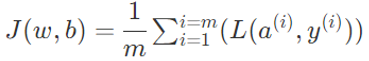

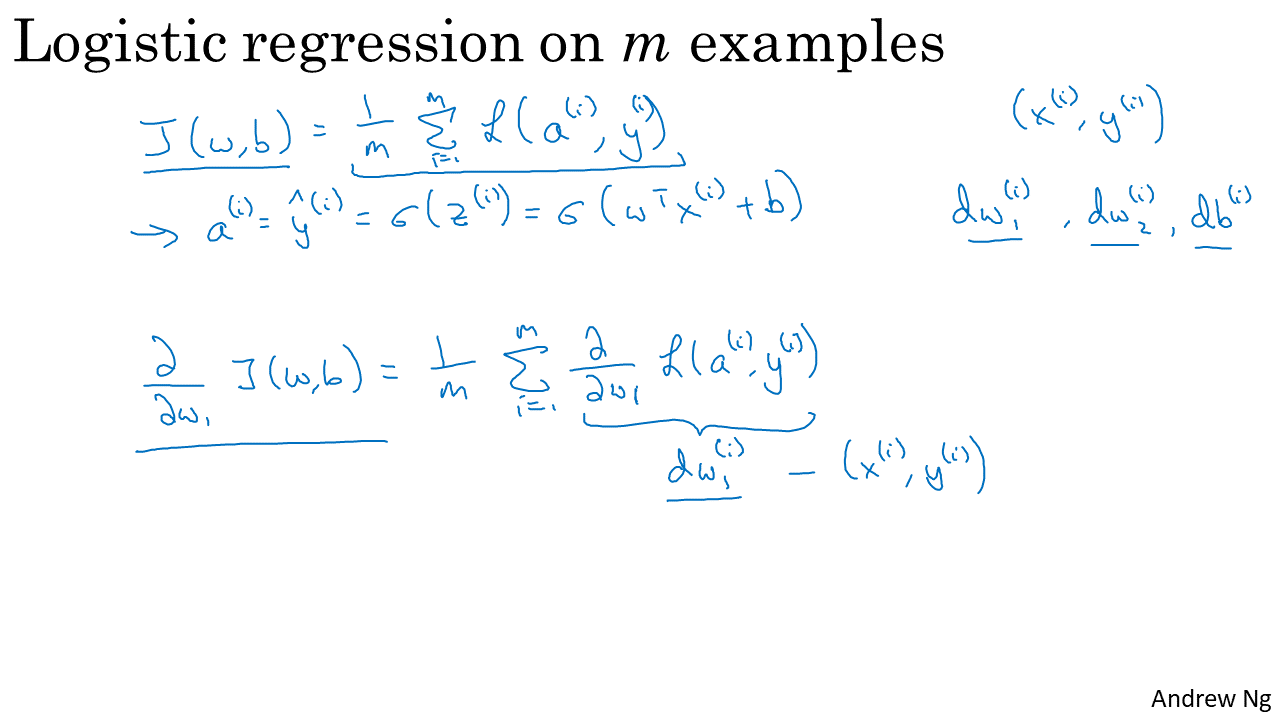

- $J(w,b)$, $\frac{dJ(w,b)}{dw_1}$, $\frac{dJ(w,b)}{dw_2}$, $\frac{dJ(w,b)}{db}$를 구하는 구현 로직.

- $m$건에 대한 for-loop를 한번 돌고 나서, 계산된 dw1, dw2, db를 이용해 w1, w2, b를 learning rate $\alpha$에 비례하여 업데이트
- for-loop를 돌고 w1, w2, b를 업데이트 하는 과정을 (J의 변화가 임계값 이하 일때까지)반복.

- 구현 중간에 'dw1', 'dw2'를 각각 구하는 부분($dw_1 += x_1^{(i)}~dz^{(i)}$, $dw_2 += x_2^{(i)}~dz^{(i)}$)이 있는데 이를 벡터연산 $dw += x^{(i)}$으로 바꿀수도 있다.
 (이런 벡터연산화는 Feature가 매우 많을 경우 더더욱 효과적일 것이다.)

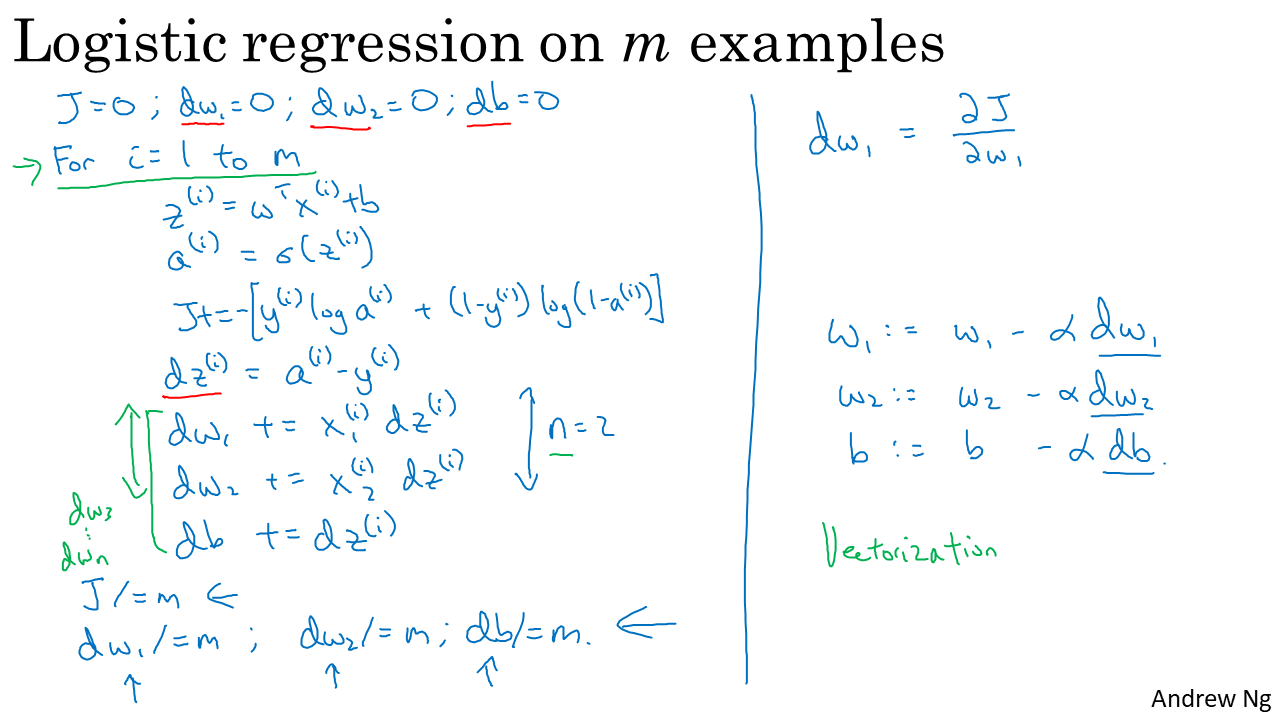

- 머신러닝에서 중요한 점은 다양한 파라미터와 많은 양의 데이터셋으로 효율적으로 코드를 작성하고 운영해야 됨.
- 파라미터의 개수가 늘어남에 따라 이중 for문을 사용하게 되면, 계산속도가 저하되는 문제점이 발생.
- 이를 해결하는 방법으로 병렬 프로세서의 한 종류인 vectorization(벡터화)를 활용.